<a href="https://colab.research.google.com/github/ti-molodykh/colab/blob/main/Python_%D0%9A%D0%BE%D0%B3%D0%BE%D1%80%D1%82%D0%BD%D1%8B%D0%B8%CC%86_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Дополнительное Занятие

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
pd.set_option("display.precision", 2)

### Cohort analysis
Когорта - это группа пользователей, которые разделяют некоторые общие критерии. Например, рассмотрим Shopcore, модное приложение для электронной коммерции.

https://www.quora.com/What-is-a-cohort-analysis

https://drive.google.com/file/d/1MvleEJkiEPaTJqmi3eLFyPUDltsW2nVp/view?usp=sharing

https://drive.google.com/file/d/1eoJ9eP_a4Dll9AYTCvYY9ezr5ldvqQo9/view?usp=sharing


Когортный анализ — способ изучить группы пользователей и клиентов, объединённых общими признаками в **определённый период времени**.

Когорта — это группа людей, которые совершили одно и то же действие **в определённый период времени**.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving printbox_print_operation (1).csv to printbox_print_operation (1).csv
Saving printbox_joined_dates (1).csv to printbox_joined_dates (1).csv


Попробуем провести анализ заказов на печать документов в одном сервисе. У нас имеется лог операций, а также даты регистрации пользователей.

В примере ниже мы будем делить пользователей на когорты исходя из даты регистрации по годам-месяцам

In [ ]:
users_df = pd.read_csv('printbox_joined_dates.csv')
operations_df = pd.read_csv('printbox_print_operation.csv')

In [ ]:
users_df.tail(10)

,Time,id
17791,2020-07-06 15:01:07,17814
17792,2020-07-06 15:49:19,17815
17793,2020-07-06 18:48:34,17816
17794,2020-07-06 22:47:32,17817
17795,2020-07-07 07:57:16,17818
17796,2020-07-07 09:33:23,17819
17797,2020-07-07 09:44:16,17820
17798,2020-07-07 09:49:52,17821
17799,2020-07-07 13:10:16,17822
17800,2020-07-07 13:11:06,17823


In [ ]:
operations_df.head()

In [ ]:
operations_df.shape

(140949, 17)

In [ ]:
users_df = users_df.rename({'Time': 'reg_date'}, axis = 1,  ) # Какие дополнительные параметры могут быть в rename?
users_df.head()

,reg_date,id
0,2017-11-28 00:19:40,2
1,2017-11-28 00:24:39,3
2,2017-11-28 00:30:21,4
3,2017-11-28 00:32:02,5
4,2017-11-28 00:36:22,6


red_date — это дата регистрации.

In [ ]:
users_df = users_df.set_index('id', verify_integrity = True) # Повторение: Что позволяет данный метод? Что если есть дубликаты в столбце?
users_df

,reg_date
id,
2,2017-11-28 00:19:40
3,2017-11-28 00:24:39
4,2017-11-28 00:30:21
5,2017-11-28 00:32:02
6,2017-11-28 00:36:22
...,...
17819,2020-07-07 09:33:23
17820,2020-07-07 09:44:16
17821,2020-07-07 09:49:52


In [ ]:
operations_df = operations_df.drop('time', axis=1) # Что нам дает axis = 1
operations_df.head()

,id,created_at,updated_at,is_hidden,price,count_completed,count_total,status,cups_id,operation_document_id,operation_owner_id,operation_printer_id,operation_printer_options_color_id,operation_printer_options_double_page_id,progress_counter,net_price
0,1,2017-11-27T21:38:54.495359Z,2017-11-27T21:39:33.371248Z,0,188,1,1,102,214.0,6,6,1,2,1,-1,0
1,2,2017-11-29T14:19:21.306698Z,2017-11-29T14:20:20.908574Z,0,190,1,1,102,215.0,5,1,1,2,1,-1,0
2,3,2017-11-29T20:29:10.736647Z,2017-11-29T20:29:53.236785Z,0,393,1,1,102,216.0,14,15,1,2,1,-1,0
3,4,2017-11-29T20:52:25.144211Z,2017-11-29T20:53:23.45643Z,0,438,1,1,102,217.0,18,15,1,2,1,-1,0
4,5,2017-11-30T09:42:39.093293Z,2017-11-30T09:43:27.492939Z,0,630,1,1,102,218.0,20,15,1,2,4,-1,0


Дата создания операции это created_at.

In [ ]:
operations_df.shape

(140949, 16)

In [ ]:
operations_df

,id,created_at,updated_at,is_hidden,price,count_completed,count_total,status,cups_id,operation_document_id,operation_owner_id,operation_printer_id,operation_printer_options_color_id,operation_printer_options_double_page_id,progress_counter,net_price
0,1,2017-11-27T21:38:54.495359Z,2017-11-27T21:39:33.371248Z,0,188,1,1,102,214.0,6,6,1,2,1,-1,0
1,2,2017-11-29T14:19:21.306698Z,2017-11-29T14:20:20.908574Z,0,190,1,1,102,215.0,5,1,1,2,1,-1,0
2,3,2017-11-29T20:29:10.736647Z,2017-11-29T20:29:53.236785Z,0,393,1,1,102,216.0,14,15,1,2,1,-1,0
3,4,2017-11-29T20:52:25.144211Z,2017-11-29T20:53:23.45643Z,0,438,1,1,102,217.0,18,15,1,2,1,-1,0
4,5,2017-11-30T09:42:39.093293Z,2017-11-30T09:43:27.492939Z,0,630,1,1,102,218.0,20,15,1,2,4,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140944,142864,2020-07-07T10:20:30.570182Z,2020-07-07T10:20:42.037663Z,0,300,1,1,1003,NaN,197596,92,49,2,1,-1,101
140945,142865,2020-07-07T10:20:57.594824Z,2020-07-07T10:21:09.11825Z,0,300,1,1,1003,NaN,197595,92,49,2,1,-1,101
140946,142866,2020-07-07T10:21:17.369061Z,2020-07-07T10:21:28.971698Z,0,300,1,1,1003,NaN,197594,92,49,2,1,-1,103
140947,142867,2020-07-07T10:22:11.384704Z,2020-07-07T10:22:33.07586Z,0,600,1,1,1003,NaN,197593,92,49,2,1,-1,210


In [ ]:
operations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140949 entries, 0 to 140948
Data columns (total 16 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   id                                        140949 non-null  int64  
 1   created_at                                140949 non-null  object 
 2   updated_at                                140949 non-null  object 
 3   is_hidden                                 140949 non-null  int64  
 4   price                                     140949 non-null  int64  
 5   count_completed                           140949 non-null  int64  
 6   count_total                               140949 non-null  int64  
 7   status                                    140949 non-null  int64  
 8   cups_id                                   8665 non-null    float64
 9   operation_document_id                     140949 non-null  int64  
 10  operation_owner_id  

In [ ]:
operations_df = operations_df.drop(['cups_id',], axis=1).dropna() # Зачем мы удаляем пропущенные значения
operations_df

,id,created_at,updated_at,is_hidden,price,count_completed,count_total,status,operation_document_id,operation_owner_id,operation_printer_id,operation_printer_options_color_id,operation_printer_options_double_page_id,progress_counter,net_price
0,1,2017-11-27T21:38:54.495359Z,2017-11-27T21:39:33.371248Z,0,188,1,1,102,6,6,1,2,1,-1,0
1,2,2017-11-29T14:19:21.306698Z,2017-11-29T14:20:20.908574Z,0,190,1,1,102,5,1,1,2,1,-1,0
2,3,2017-11-29T20:29:10.736647Z,2017-11-29T20:29:53.236785Z,0,393,1,1,102,14,15,1,2,1,-1,0
3,4,2017-11-29T20:52:25.144211Z,2017-11-29T20:53:23.45643Z,0,438,1,1,102,18,15,1,2,1,-1,0
4,5,2017-11-30T09:42:39.093293Z,2017-11-30T09:43:27.492939Z,0,630,1,1,102,20,15,1,2,4,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140944,142864,2020-07-07T10:20:30.570182Z,2020-07-07T10:20:42.037663Z,0,300,1,1,1003,197596,92,49,2,1,-1,101
140945,142865,2020-07-07T10:20:57.594824Z,2020-07-07T10:21:09.11825Z,0,300,1,1,1003,197595,92,49,2,1,-1,101
140946,142866,2020-07-07T10:21:17.369061Z,2020-07-07T10:21:28.971698Z,0,300,1,1,1003,197594,92,49,2,1,-1,103
140947,142867,2020-07-07T10:22:11.384704Z,2020-07-07T10:22:33.07586Z,0,600,1,1,1003,197593,92,49,2,1,-1,210


operation_owner_id соответствует идентификатору пользователя, который производил операцию

In [ ]:
operations_df = operations_df.astype({'operation_owner_id': np.int32})
operations_df

,id,created_at,updated_at,is_hidden,price,count_completed,count_total,status,operation_document_id,operation_owner_id,operation_printer_id,operation_printer_options_color_id,operation_printer_options_double_page_id,progress_counter,net_price
0,1,2017-11-27T21:38:54.495359Z,2017-11-27T21:39:33.371248Z,0,188,1,1,102,6,6,1,2,1,-1,0
1,2,2017-11-29T14:19:21.306698Z,2017-11-29T14:20:20.908574Z,0,190,1,1,102,5,1,1,2,1,-1,0
2,3,2017-11-29T20:29:10.736647Z,2017-11-29T20:29:53.236785Z,0,393,1,1,102,14,15,1,2,1,-1,0
3,4,2017-11-29T20:52:25.144211Z,2017-11-29T20:53:23.45643Z,0,438,1,1,102,18,15,1,2,1,-1,0
4,5,2017-11-30T09:42:39.093293Z,2017-11-30T09:43:27.492939Z,0,630,1,1,102,20,15,1,2,4,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140944,142864,2020-07-07T10:20:30.570182Z,2020-07-07T10:20:42.037663Z,0,300,1,1,1003,197596,92,49,2,1,-1,101
140945,142865,2020-07-07T10:20:57.594824Z,2020-07-07T10:21:09.11825Z,0,300,1,1,1003,197595,92,49,2,1,-1,101
140946,142866,2020-07-07T10:21:17.369061Z,2020-07-07T10:21:28.971698Z,0,300,1,1,1003,197594,92,49,2,1,-1,103
140947,142867,2020-07-07T10:22:11.384704Z,2020-07-07T10:22:33.07586Z,0,600,1,1,1003,197593,92,49,2,1,-1,210


Соединим два датафрейма по operation_owner_id.

In [ ]:
joined = pd.merge(operations_df.set_index('operation_owner_id'), users_df, left_index=True, right_index=True)
joined.head(5)

,id,created_at,updated_at,is_hidden,price,count_completed,count_total,status,operation_document_id,operation_printer_id,operation_printer_options_color_id,operation_printer_options_double_page_id,progress_counter,net_price,reg_date
2,16914,2018-08-19T11:06:00.374048Z,2018-08-19T11:06:19.451252Z,0,506,1,1,1003,18169,7,2,1,-1,0,2017-11-28 00:19:40
2,23786,2018-10-29T13:39:11.224314Z,2018-10-29T13:40:01.273631Z,0,842,1,1,1003,26955,2,2,1,-1,0,2017-11-28 00:19:40
2,42284,2019-03-06T20:08:10.483488Z,2019-03-06T20:10:04.066986Z,0,270,1,1,1003,36161,11,2,1,-1,90,2017-11-28 00:19:40
3,17,2017-12-04T17:07:04.00181Z,2017-12-04T17:07:40.451122Z,0,208,1,1,102,35,1,2,1,-1,0,2017-11-28 00:24:39
3,22,2017-12-04T20:36:11.301773Z,2017-12-04T20:36:44.153777Z,0,420,1,1,102,40,1,2,1,-1,0,2017-11-28 00:24:39


Оставим только нужные нам колонки и установим корректные типы данных

In [ ]:
df = joined[['created_at', 'reg_date', 'id']]
df = df.astype({
    'created_at': np.datetime64, # Дата создания заказа, необходимо для демонстрации жизненного цикла пользователя
    'reg_date': np.datetime64, # Дата регистрации, необходима для 
    'id': np.int32
    })
df


,created_at,reg_date,id
2,2018-08-19 11:06:00.374048,2017-11-28 00:19:40,16914
2,2018-10-29 13:39:11.224314,2017-11-28 00:19:40,23786
2,2019-03-06 20:08:10.483488,2017-11-28 00:19:40,42284
3,2017-12-04 17:07:04.001810,2017-11-28 00:24:39,17
3,2017-12-04 20:36:11.301773,2017-11-28 00:24:39,22
...,...,...,...
17817,2020-07-06 19:53:43.887681,2020-07-06 22:47:32,142819
17817,2020-07-06 19:54:02.027683,2020-07-06 22:47:32,142820
17820,2020-07-07 06:48:29.708994,2020-07-07 09:44:16,142837
17821,2020-07-07 07:00:42.598270,2020-07-07 09:49:52,142838


Выделим из даты регистрации год и месяц

In [ ]:
df['reg_date'].dt.strftime('%Y-%m')  # такой способ более предпочтителен

2        2017-11
2        2017-11
2        2017-11
3        2017-11
3        2017-11
          ...   
17817    2020-07
17817    2020-07
17820    2020-07
17821    2020-07
17821    2020-07
Name: reg_date, Length: 137689, dtype: object

Так мы будем идентифицировать когорты

In [ ]:
df['CohortGroup'] = df['reg_date'].apply(lambda x: x.strftime('%Y-%m'))
df = df.drop('reg_date', axis=1)
df

,created_at,id,CohortGroup
2,2018-08-19 11:06:00.374048,16914,2017-11
2,2018-10-29 13:39:11.224314,23786,2017-11
2,2019-03-06 20:08:10.483488,42284,2017-11
3,2017-12-04 17:07:04.001810,17,2017-11
3,2017-12-04 20:36:11.301773,22,2017-11
...,...,...,...
17817,2020-07-06 19:53:43.887681,142819,2020-07
17817,2020-07-06 19:54:02.027683,142820,2020-07
17820,2020-07-07 06:48:29.708994,142837,2020-07
17821,2020-07-07 07:00:42.598270,142838,2020-07


Также будем идентифицировать периоды в которые происходят заказы. Определим колонку OrderPeriod

In [ ]:
df['OrderPeriod'] = df['created_at'].apply(lambda x: x.strftime('%Y-%m'))
df = df.drop('created_at', axis=1)
df

,id,CohortGroup,OrderPeriod
2,16914,2017-11,2018-08
2,23786,2017-11,2018-10
2,42284,2017-11,2019-03
3,17,2017-11,2017-12
3,22,2017-11,2017-12
...,...,...,...
17817,142819,2020-07,2020-07
17817,142820,2020-07,2020-07
17820,142837,2020-07,2020-07
17821,142838,2020-07,2020-07


Теперь посчитаем для каждой когорты и каждого периода кол-во заказов

In [ ]:
df = df.groupby(['CohortGroup', 'OrderPeriod']).count().rename({'id': 'orders'}, axis=1)
df

orders
CohortGroup OrderPeriod        
2017-11     2017-11           4
            2017-12          13
            2018-01          21
            2018-02          31
            2018-03          25
...                         ...
2020-05     2020-06         161
            2020-07          16
2020-06     2020-06         460
            2020-07          33
2020-07     2020-07          69

[560 rows x 1 columns]

Оставим идентификацию периодов как "первый" месяц, "второй" месяц, "третий" месяц, ... 

In [ ]:
def cohort_period(df):
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

cohorts = df.groupby(level=0).apply(cohort_period)
cohorts

orders  CohortPeriod
CohortGroup OrderPeriod                      
2017-11     2017-11           4             1
            2017-12          13             2
            2018-01          21             3
            2018-02          31             4
            2018-03          25             5
...                         ...           ...
2020-05     2020-06         161             2
            2020-07          16             3
2020-06     2020-06         460             1
            2020-07          33             2
2020-07     2020-07          69             1

[560 rows x 2 columns]

In [ ]:
df.groupby(level=0).apply(cohort_period)

orders  CohortPeriod
CohortGroup OrderPeriod                      
2017-11     2017-11           4             1
            2017-12          13             2
            2018-01          21             3
            2018-02          31             4
            2018-03          25             5
...                         ...           ...
2020-05     2020-06         161             2
            2020-07          16             3
2020-06     2020-06         460             1
            2020-07          33             2
2020-07     2020-07          69             1

[560 rows x 2 columns]

In [ ]:
results = cohorts.reset_index().set_index(['CohortGroup', 'CohortPeriod']).drop('OrderPeriod', axis=1)
results


orders
CohortGroup CohortPeriod        
2017-11     1                  4
            2                 13
            3                 21
            4                 31
            5                 25
...                          ...
2020-05     2                161
            3                 16
2020-06     1                460
            2                 33
2020-07     1                 69

[560 rows x 1 columns]

Теперь осталось сделать трюк с помощью .unstack()

In [ ]:
results = results.unstack(level=1)
results

orders                                                         \
CohortPeriod      1       2       3       4      5       6       7       8    
CohortGroup                                                                   
2017-11          4.0    13.0    21.0    31.0   25.0    45.0    40.0    59.0   
2017-12       1346.0  1036.0   734.0  1007.0  918.0  1207.0   839.0   146.0   
2018-01        643.0   304.0   334.0   251.0  376.0   253.0    36.0    16.0   
2018-02        292.0   275.0   155.0   296.0  167.0     4.0     2.0   100.0   
2018-03        240.0   150.0   211.0    78.0    8.0     2.0   164.0   146.0   
2018-04        336.0   440.0   187.0    29.0    4.0   239.0   266.0   374.0   
2018-05        727.0   353.0    58.0    25.0  164.0   248.0   161.0   262.0   
2018-06        309.0    35.0     7.0    76.0  115.0   110.0   116.0    66.0   
2018-07        110.0     3.0    43.0    38.0   31.0    30.0     2.0    11.0   
2018-08         41.0    45.0    64.0    42.0   50.0     5.0    34.0    35.0   
2018-09       1008.0  1228.0  1228.0  1289.0  438.0   977.0  1273.0  1239.0   
2018-10          1.0   787.0   627.0   748.0  206.0   379.0   583.0   664.0   
2018-11          2.0   482.0   482.0   127.0  173.0   335.0   343.0   369.0   
2018-12        949.0   199.0   252.0   364.0  413.0   607.0   408.0    93.0   
2019-01        388.0   126.0   158.0   175.0  158.0   165.0   112.0    54.0   
2019-02        485.0   381.0   311.0   335.0  320.0   128.0    73.0   147.0   
2019-03       1039.0   666.0   584.0   497.0  113.0    61.0   289.0   373.0   
2019-04          5.0   946.0   553.0   322.0   58.0    22.0   194.0   205.0   
2019-05       1399.0   542.0   108.0    48.0  250.0   234.0   201.0   442.0   
2019-06       1072.0   180.0    58.0   180.0  183.0   174.0   308.0   198.0   
2019-07        356.0   132.0    71.0    51.0   62.0    90.0    60.0    46.0   
2019-08        350.0   320.0   270.0   222.0  237.0   104.0   223.0   124.0   
2019-09       2297.0  2046.0  1471.0  1732.0  660.0  1380.0   898.0   112.0   
2019-10       1683.0   929.0  1240.0   562.0  801.0   526.0    70.0    97.0   
2019-11       1542.0  1201.0   435.0   338.0  255.0    55.0    55.0    38.0   
2019-12       3563.0   862.0   663.0   493.0   47.0    67.0   149.0    62.0   
2020-01       1148.0   269.0   172.0    27.0   50.0    45.0     5.0     NaN   
2020-02       1053.0   391.0    28.0    36.0   51.0    37.0     NaN     NaN   
2020-03        548.0    46.0    59.0    72.0   33.0     NaN     NaN     NaN   
2020-04        507.0   302.0   205.0    42.0    NaN     NaN     NaN     NaN   
2020-05        291.0   161.0    16.0     NaN    NaN     NaN     NaN     NaN   
2020-06        460.0    33.0     NaN     NaN    NaN     NaN     NaN     NaN   
2020-07         69.0     NaN     NaN     NaN    NaN     NaN     NaN     NaN   

                             ...                                            \
CohortPeriod      9      10  ...     23     24     25     26     27     28   
CohortGroup                  ...                                             
2017-11         29.0   25.0  ...   15.0   21.0    9.0   26.0    1.0   12.0   
2017-12         87.0  751.0  ...  480.0  535.0  630.0  413.0  399.0  329.0   
2018-01        192.0  214.0  ...  102.0  118.0  110.0  140.0   92.0    1.0   
2018-02        165.0  196.0  ...  145.0  152.0   83.0   90.0   12.0    6.0   
2018-03        142.0  153.0  ...   98.0   60.0   92.0   15.0    7.0   37.0   
2018-04        402.0  111.0  ...  106.0  125.0   15.0   33.0   77.0    7.0   
2018-05        110.0  102.0  ...  173.0   16.0   16.0   48.0   19.0    NaN   
2018-06        103.0  151.0  ...   18.0   35.0   90.0    2.0    NaN    NaN   
2018-07         22.0   16.0  ...   45.0   48.0   10.0    NaN    NaN    NaN   
2018-08         25.0   25.0  ...   38.0    NaN    NaN    NaN    NaN    NaN   
2018-09       1173.0  686.0  ...   22.0    NaN    NaN    NaN    NaN    NaN   
2018-10        680.0  412.0  ...   14.0    NaN    NaN    NaN    NaN    NaN   

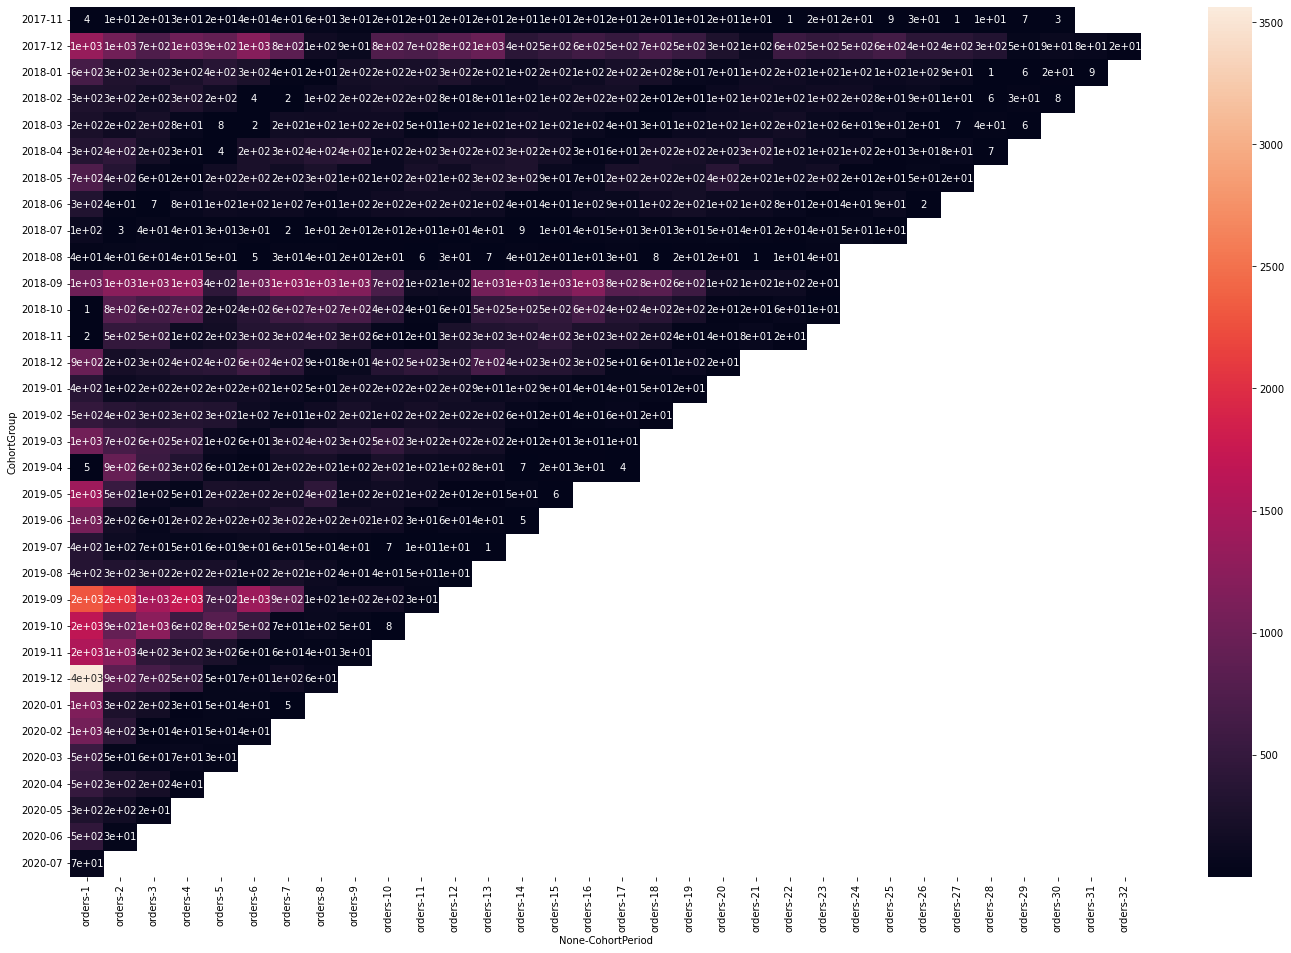

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(24, 16))
sns.heatmap(results, mask=results.isnull(), annot=True, fmt='.1g')

Тогда цвета указываются относительно абсолютных значений за весь период, сделаем нормировку по строчкам, чтобы увидеть периодическую динамику по кол-ву заказов

In [ ]:
results.T.max()

CohortGroup
2017-11      59.0
2017-12    1346.0
2018-01     643.0
2018-02     296.0
2018-03     240.0
2018-04     440.0
2018-05     727.0
2018-06     309.0
2018-07     110.0
2018-08      64.0
2018-09    1289.0
2018-10     787.0
2018-11     482.0
2018-12     949.0
2019-01     388.0
2019-02     485.0
2019-03    1039.0
2019-04     946.0
2019-05    1399.0
2019-06    1072.0
2019-07     356.0
2019-08     350.0
2019-09    2297.0
2019-10    1683.0
2019-11    1542.0
2019-12    3563.0
2020-01    1148.0
2020-02    1053.0
2020-03     548.0
2020-04     507.0
2020-05     291.0
2020-06     460.0
2020-07      69.0
dtype: float64

In [ ]:
results_relative = results.divide(results.T.max(), axis=0).round(decimals = 2)
results_relative

orders                                                        \
CohortPeriod     1     2     3     4     5     6     7     8     9     10   
CohortGroup                                                                 
2017-11        0.07  0.22  0.36  0.53  0.42  0.76  0.68  1.00  0.49  0.42   
2017-12        1.00  0.77  0.55  0.75  0.68  0.90  0.62  0.11  0.06  0.56   
2018-01        1.00  0.47  0.52  0.39  0.58  0.39  0.06  0.02  0.30  0.33   
2018-02        0.99  0.93  0.52  1.00  0.56  0.01  0.01  0.34  0.56  0.66   
2018-03        1.00  0.62  0.88  0.32  0.03  0.01  0.68  0.61  0.59  0.64   
2018-04        0.76  1.00  0.42  0.07  0.01  0.54  0.60  0.85  0.91  0.25   
2018-05        1.00  0.49  0.08  0.03  0.23  0.34  0.22  0.36  0.15  0.14   
2018-06        1.00  0.11  0.02  0.25  0.37  0.36  0.38  0.21  0.33  0.49   
2018-07        1.00  0.03  0.39  0.35  0.28  0.27  0.02  0.10  0.20  0.15   
2018-08        0.64  0.70  1.00  0.66  0.78  0.08  0.53  0.55  0.39  0.39   
2018-09        0.78  0.95  0.95  1.00  0.34  0.76  0.99  0.96  0.91  0.53   
2018-10        0.00  1.00  0.80  0.95  0.26  0.48  0.74  0.84  0.86  0.52   
2018-11        0.00  1.00  1.00  0.26  0.36  0.70  0.71  0.77  0.57  0.13   
2018-12        1.00  0.21  0.27  0.38  0.44  0.64  0.43  0.10  0.09  0.37   
2019-01        1.00  0.32  0.41  0.45  0.41  0.43  0.29  0.14  0.40  0.42   
2019-02        1.00  0.79  0.64  0.69  0.66  0.26  0.15  0.30  0.48  0.29   
2019-03        1.00  0.64  0.56  0.48  0.11  0.06  0.28  0.36  0.30  0.46   
2019-04        0.01  1.00  0.58  0.34  0.06  0.02  0.21  0.22  0.11  0.25   
2019-05        1.00  0.39  0.08  0.03  0.18  0.17  0.14  0.32  0.09  0.12   
2019-06        1.00  0.17  0.05  0.17  0.17  0.16  0.29  0.18  0.16  0.14   
2019-07        1.00  0.37  0.20  0.14  0.17  0.25  0.17  0.13  0.10  0.02   
2019-08        1.00  0.91  0.77  0.63  0.68  0.30  0.64  0.35  0.10  0.12   
2019-09        1.00  0.89  0.64  0.75  0.29  0.60  0.39  0.05  0.06  0.07   
2019-10        1.00  0.55  0.74  0.33  0.48  0.31  0.04  0.06  0.03  0.00   
2019-11        1.00  0.78  0.28  0.22  0.17  0.04  0.04  0.02  0.02   NaN   
2019-12        1.00  0.24  0.19  0.14  0.01  0.02  0.04  0.02   NaN   NaN   
2020-01        1.00  0.23  0.15  0.02  0.04  0.04  0.00   NaN   NaN   NaN   
2020-02        1.00  0.37  0.03  0.03  0.05  0.04   NaN   NaN   NaN   NaN   
2020-03        1.00  0.08  0.11  0.13  0.06   NaN   NaN   NaN   NaN   NaN   
2020-04        1.00  0.60  0.40  0.08   NaN   NaN   NaN   NaN   NaN   NaN   
2020-05        1.00  0.55  0.05   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2020-06        1.00  0.07   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2020-07        1.00   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

              ...                                                              
CohortPeriod  ...    23    24    25    26    27    28    29    30    31    32  
CohortGroup   ...                                                              
2017-11       ...  0.25  0.36  0.15  0.44  0.02  0.20  0.12  0.05   NaN   NaN  
2017-12       ...  0.36  0.40  0.47  0.31  0.30  0.24  0.04  0.06  0.06  0.02  
2018-01       ...  0.16  0.18  0.17  0.22  0.14  0.00  0.01  0.04  0.01   NaN  
2018-02       ...  0.49  0.51  0.28  0.30  0.04  0.02  0.11  0.03   NaN   NaN  
2018-03       ...  0.41  0.25  0.38  0.06  0.03  0.15  0.02   NaN   NaN   NaN  
2018-04       ...  0.24  0.28  0.03  0.08  0.18  0.02   NaN   NaN   NaN   NaN  
2018-05       ...  0.24  0.02  0.02  0.07  0.03   NaN   NaN   NaN   NaN   NaN  
2018-06       ...  0.06  0.11  0.29  0.01   NaN   NaN   NaN   NaN   NaN   NaN  
2018-07       ...  0.41  0.44  0.09   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2018-08       ...  0.59   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2018-09       ...  0.02   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2018-10       ...  0.02   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2018-11       ...   NaN   NaN   NaN   Na

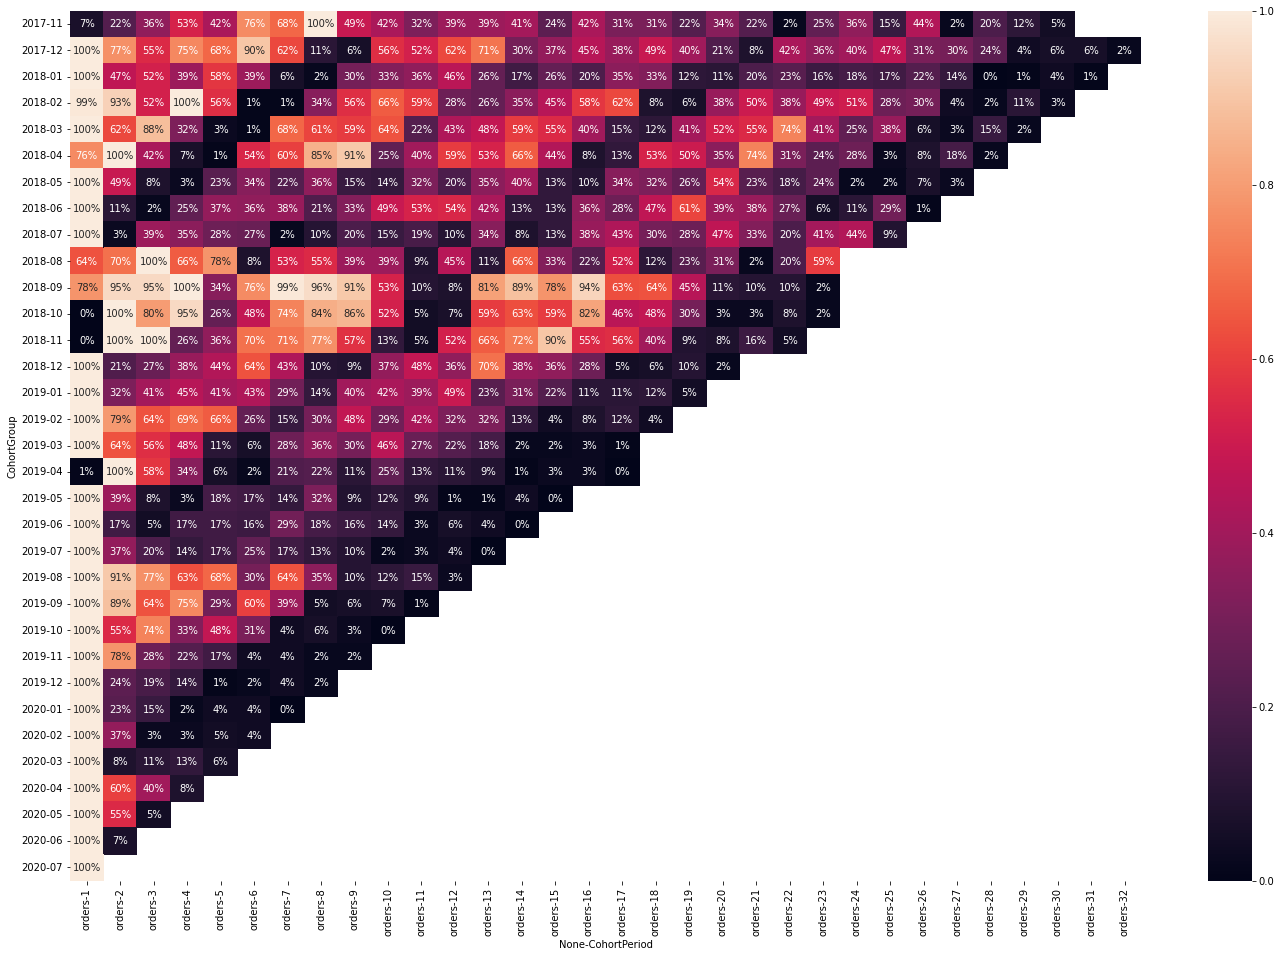

In [ ]:
plt.figure(figsize=(24, 16))
sns.heatmap(results_relative, mask=results_relative.isnull(), annot=True, fmt='.0%')

Вопрос на внимательность, почему иногда значения в первых клетках отличны от 100%?

На данном графике видны когорты для которых происходит увеличение их вовлеченности, т.е. количество заказов после регистрации и первых заказов и когорты для которых происходит обратная ситуация. Что можно делать дальше?


*   Рассмотреть совокупно данные когорты, по характеристикам из начального датафрейма
*   Выявить сезонность метрики оттока - в какие сезоны наши клиенты быстрее охладевают к продукту
*   Провести AB-тестирование для когорт, у которых происходит повышение заинтересованности 



